In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt
import pymc as pm

In [3]:
path = "../data/raw/BrentOilPrices.csv"
data = pd.read_csv(path)
data.shape

(9011, 2)

In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')
data = data.set_index('Date')

# Preprocess the data
data['Price'] = data['Price'].interpolate()

C:\Users\hp\AppData\Local\Temp\ipykernel_9136\2604754867.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [5]:
data.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


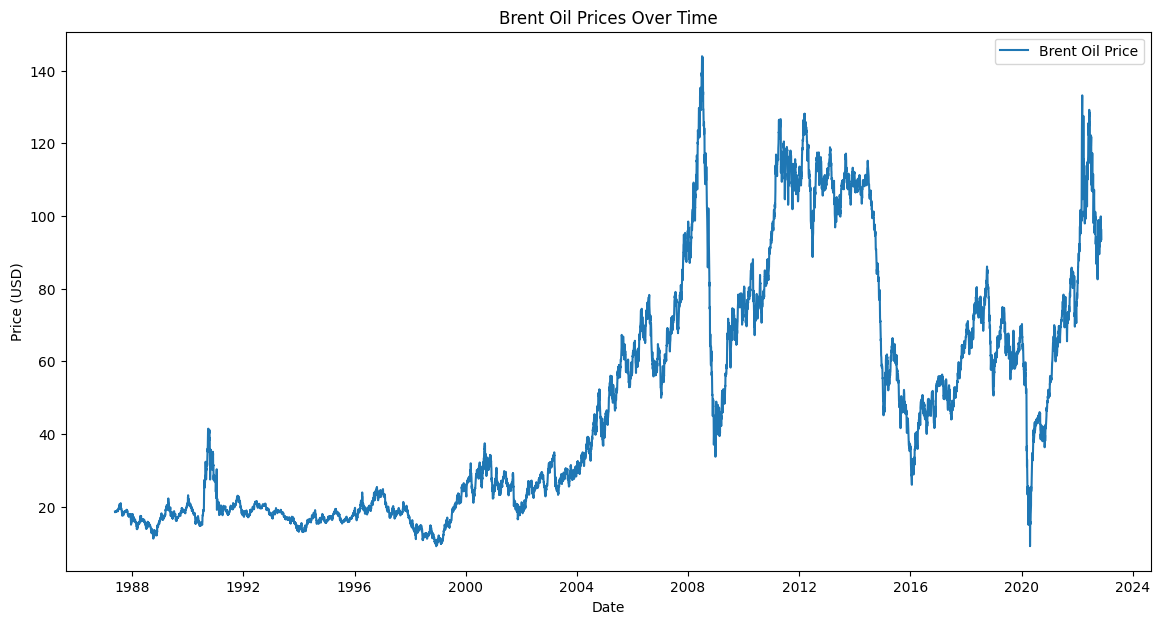

In [6]:
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Price'], label='Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Brent Oil Prices Over Time')
plt.legend()
plt.show()

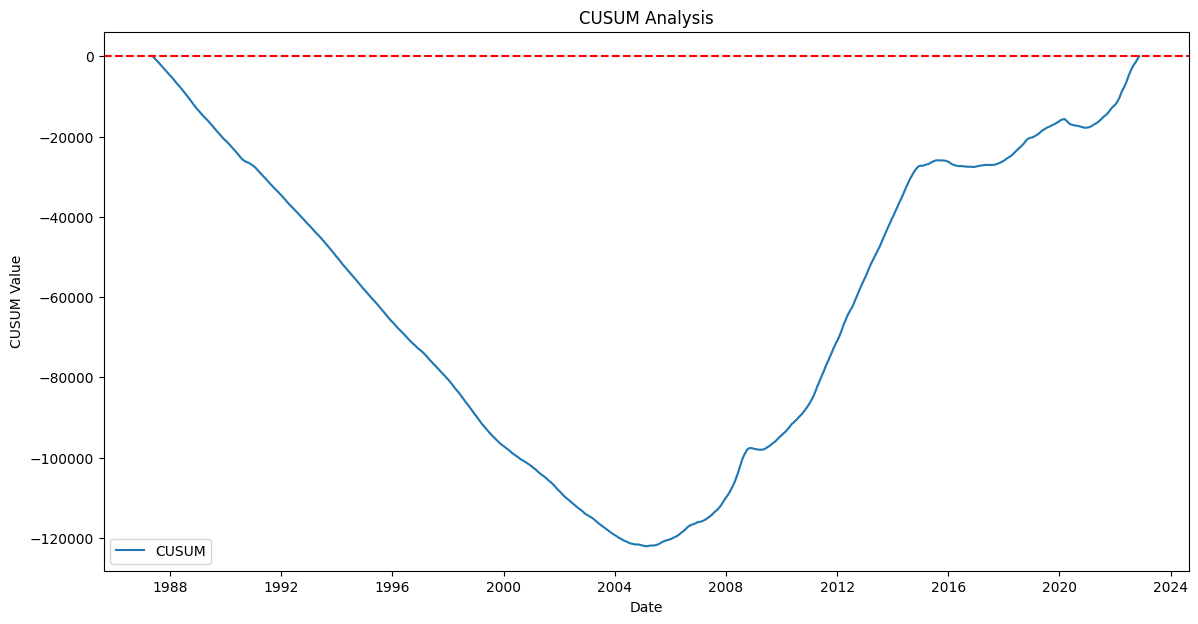

In [7]:
# CUSUM method
mean_price = data['Price'].mean()
cusum = np.cumsum(data['Price'] - mean_price)
plt.figure(figsize=(14, 7))
plt.plot(data.index, cusum, label='CUSUM')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('CUSUM Value')
plt.title('CUSUM Analysis')
plt.legend()
plt.show()

In [ ]:
# Assuming 'data' is your DataFrame and 'mean_price' is defined as the mean of the 'Price' column
mean_price = data['Price'].mean()

with pm.Model() as model:
    # Priors
    mean_prior = pm.Normal('mean_prior', mu=mean_price, sigma=10)
    change_point = pm.DiscreteUniform('change_point', lower=0, upper=len(data)-1)

    # Likelihood
    likelihood = pm.Normal('likelihood', mu=mean_prior, sigma=10, observed=data['Price'])

    # Inference using MCMC
    trace = pm.sample(1000, tune=1000, cores=2, step=pm.Metropolis())

# Plot posterior distribution
pm.plot_posterior(trace)
plt.show()


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [mean_prior]
>Metropolis: [change_point]


Output()

In [ ]:
change_point_index = 4753

# Plot the data with the change point
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Price'], label='Brent Oil Price')
plt.axvline(x=data.index[change_point_index], color='red', linestyle='--', label='Change Point')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Brent Oil Prices with Change Point')
plt.legend()
plt.show()